<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Installation" data-toc-modified-id="Installation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Installation</a></span><ul class="toc-item"><li><span><a href="#Cloning-the-project" data-toc-modified-id="Cloning-the-project-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cloning the project</a></span></li><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dependencies</a></span></li><li><span><a href="#Compilation" data-toc-modified-id="Compilation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Compilation</a></span></li></ul></li><li><span><a href="#Running-a-case" data-toc-modified-id="Running-a-case-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Running a case</a></span><ul class="toc-item"><li><span><a href="#The-advection-equation" data-toc-modified-id="The-advection-equation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>The advection equation</a></span><ul class="toc-item"><li><span><a href="#Calling-the-right-modules-for-running-the-case" data-toc-modified-id="Calling-the-right-modules-for-running-the-case-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Calling the right modules for running the case</a></span></li><li><span><a href="#Creating-the-mesh" data-toc-modified-id="Creating-the-mesh-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Creating the mesh</a></span></li><li><span><a href="#Creating-the-initial-solution" data-toc-modified-id="Creating-the-initial-solution-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Creating the initial solution</a></span></li><li><span><a href="#Creating-the-options-to-call-MUFFIN" data-toc-modified-id="Creating-the-options-to-call-MUFFIN-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Creating the options to call MUFFIN</a></span></li></ul></li><li><span><a href="#How-to-choose-the-numerical-method" data-toc-modified-id="How-to-choose-the-numerical-method-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>How to choose the numerical method</a></span><ul class="toc-item"><li><span><a href="#Other-options" data-toc-modified-id="Other-options-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Other options</a></span></li><li><span><a href="#Running-the-code" data-toc-modified-id="Running-the-code-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Running the code</a></span></li><li><span><a href="#Visualizing-the-results" data-toc-modified-id="Visualizing-the-results-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Visualizing the results</a></span></li></ul></li><li><span><a href="#Euler-equations" data-toc-modified-id="Euler-equations-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Euler equations</a></span></li></ul></li><li><span><a href="#Visualize-individual-results" data-toc-modified-id="Visualize-individual-results-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualize individual results</a></span></li><li><span><a href="#Animation" data-toc-modified-id="Animation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Animation</a></span></li></ul></div>

# Description

MUFFIN (MUlti-Fluid solver for IoN propulsion) is a finite volume solver for the fluid equations in electric propulsion applications.

MUFFIN is written mainly in C++ and interfaced with other libraries. MUFFIN is created as a module for python, using pybind11 (https://pybind11.readthedocs.io/en/stable/). Additionally, it is also parallelized with MPI (https://en.wikipedia.org/wiki/Message_Passing_Interface) and uses PETSc (https://www.mcs.anl.gov/petsc/) for the resolution of linear systems.



# Installation

## Cloning the project

If you are reading this, it means that you have cloned the git repository of MUFFIN. If you want to clone it in a different computer, you need to do in a terminal:

`git clone https://hephaistos.lpp.polytechnique.fr/rhodecode/GIT_REPOSITORIES/LPP/Users/Alvarez/MUFFIN ./`

`cd MUFFIN`

`git submodule update --init --recursive`


## Dependencies

You need to have a version of cmake, install PETSc, and python (version > 3.0).


## Compilation

Once you are in `./MUFFIN`, you need to create a folder where you will build (compile) your executable. To do so, you need to do:

```mkdir build; cd build; cmake ..; make -j 16;```

If the compilation worked, you should arrive to the 100% of the compilation without any compilation error. If you have compilation errors, it means that you might have problems with the compilation of the external dependencies (PETSC, python or MPI).

# Running a case


## The advection equation

With MUFFIN you can solve different system of equations. We will start with a simple 1D case solving for the advection equation. This equation reads:

$$ \partial_t \rho + a\partial_x \rho = 0$$,
with $a > 0$.

We will study the case with the following initial field and boundary conditions:

$$\rho(t=0, x) = 0,~~~ \rho(t, x = 0) = 1 ~~~\text{and}~~~\partial_x\rho(t, x = L) = 0$$


In order to run the case, you need to create a python script that will use the module `muffin`, as explained below.


### Calling the right modules for running the case

Inside the python script, you need to write the following. You will find the testcase inside the folder `testcases/test_advectionEq.py`.

First, you need to call the right python modules that will be used to create the configuration file of muffin. We suggest to do the following:

In [2]:
import sys
from mpi4py import MPI
sys.path.append(sys.path[0] + '/../PythonTools/')
import plotResults 
sys.path.append('../build')                     ## We add this to include the module muffin
import muffin                                   ## module in C++ doing the simulation
import glob                                     ## module for unix pathname pattern expansion
import matplotlib.pyplot as plt                 ## plots
import os                                       ## operating system interface
import numpy as np                              ## Mathematic operations
import shutil


### Creating the mesh

We create a mesh with elements that are at the interface between the cells. For this reason, the size of the mesh will be `nbCells + 1`.



In [2]:
# Set Mesh

length  = 1.
nbCells = 100 

mesh = [0 for i in range(nbCells + 1)]
for iCell in range(nbCells + 1):
    delta_X = length/nbCells 
    mesh[iCell] = iCell*delta_X

### Creating the initial solution

In this case, the initial solution is a vector for one variable, as follows:


In [3]:
nbEqs   = 1
InitialField = [0 for i in range(nbEqs*nbCells)]


### Creating the options to call MUFFIN

The parameters of the simulation are described in a dictionary that include all the options for the simulation. To see where the options are implemented, you need to see the file `src/Configuration.cpp`. The options for the advection equation read:

In [4]:
options = {
    'nbEqs':nbEqs,
    'nbFluids':1,
    'nbCells':[nbCells],
    'geometry':"1D",
    'mesh':mesh,
    'length':length,
    'stopCondition':{'type':"nbSteps",'value':2000},
    #'stopCondition':{'type':"Residual",'value':-12},
    'Inlet':{'type':"Dirichlet", 'value':[1.],},
    'Outlet':{'type':"Neumann",},
    'PhysicalModel':{
        'type':"AdvectionEq1D",
        'A':1.,
    },
    'SourceTerm':{'type':"NullSourceTerm",}, 
    'CFL':0.1,
    'saveRate':20,
    'resultDir':"./Results_advection",
    'limiter':"thirdOrder",#"thirdOrder",
    'reconstruction':"TVD2ndOrder1D",#"TVD2ndOrder1D",
    'fluxScheme':"LaxFriedrich",
    'timeScheme':"ForwardEuler",#"TVDRK3",
    'initialField':InitialField,
}

## How to choose the numerical method

MUFFIN is a cell center finite volume solver. In the case of the advection equation, the equation is discretized as:

$$ \rho_i^{n+1} = \rho_i^{n} - \frac{\Delta t}{\Delta x} \left(F^{n}_{i + 1/2} - F^{n}_{i + 1/2} \right)$$

Where the flux at the interface is expressed as:

$$ F_{i + 1/2} = \frac{a}{2}\left(\rho_{i} + \rho_{i + 1} \right) - \frac{|a|}{2}\left(\rho_{i + 1} - \rho_{i} \right)$$

This scheme is called Lax-Friedrich, which in the case of the advection equation is exactly the same as the upwind scheme.

### Other options

The scheme above is the simplest stable scheme for the advection equation. However, we can do second order reconstruction with slope limiter by changing the option:

```python
'limiter':"thirdOrder",
'reconstruction':"TVD2ndOrder1D",
```

Also, we can use higher order discretization in time by changing 

```python
'timeScheme':"TVDRK3"
```

### Running the code

We call the solver in Muffin with the options in the reference


In [5]:
## Run simulation
if os.path.exists(options['resultDir']):
    shutil.rmtree(options['resultDir']) # Removes the old results
muffin.Solver(options)

****************************************************************



			CONFIGURATION PHASE		


****************************************************************



			SET-UP PHASE		


Setting-up Simulation class:	  Fluid Simulation 

Setting-up Space discretization class:	  FVM1D 

Reconstructor using limiter:	  thirdOrder 

Space discretization using the flux scheme:	  LaxFriedrich 

Space discretization using the source term:	  NullSourceTerm 

Space discretization using the reconstructor:	  TVD2ndOrder1D 

Writing results in :	 ./Results_advection 


****************************************************************




			SIMULATION PHASE		



****************************************************************


dt =  0.0009999999999999898
Iter[ 100 ] 	 Res = [ -0.28522 ]	 PhysTime =  1.000e-01
dt =  0.0009999999999999898
Iter[ 200 ] 	 Res = [ -0.31031 ]	 PhysTime =  2.000e-01
dt =  0.0009999999999999898
Iter[ 300 ] 	 Res = [ -0.31981 ]	 PhysTime =  3.000e-01
dt =  0.0009999999999999898


### Visualizing the results
 
We have the library plotResults inside PythonTools in order to read the results:


In [7]:
import sys  
import os
import numpy as np

# IMPORT PATH TO PYTHONTOOLS MODULE"
sys.path.append('/Users/ab/Documents/1_Postdoc/MUFFIN/PythonTools')

import plotResults
import tkinter as tk

from tkinter import filedialog


get_ipython().run_line_magic('gui', 'tk')

root = tk.Tk()
root.withdraw()
currentPath = os.getcwd()
filename = filedialog.askopenfilename(parent=root, initialdir=currentPath)
root.destroy()

print('Reading %s' % filename)

results = []
with open(filename, 'r') as data:
    j = 0                   # counter of the lines of the file
    for line in data:
        p = line.split()
        results.append(np.array(p))


# Transpose and change data type
results = np.array(results)
resultsTP = np.transpose(results)

resultsTP   = resultsTP.astype(np.float)        

plotData = plotResults.Data(resultsTP)
# Initializing without the results to choose it directly by hand
#plotData2 = plotResults.Data()

print("NbEqs = ", plotData.nbEqs)
print("NbCells = ",plotData.nbCells)

x       = plotData.resultsArray[0]
rho     = plotData.resultsArray[1]

Reading /Users/alvarez/Documents/1_Simulation/MUFFIN_Oxigen_Iodine/notebooks/Results_advection/file_iter_000560_time_5.6000e-01.txt
NbEqs =  1
NbCells =  100


/var/folders/dm/fpq2vxz16_9577l0qt42tjqw0000gn/T/ipykernel_8250/2458753179.py:36: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  resultsTP   = resultsTP.astype(np.float)


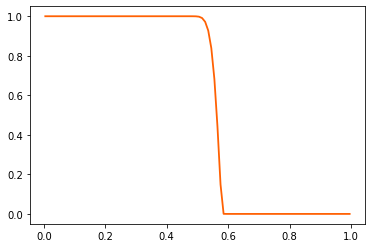

In [8]:
f, ax = plt.subplots(1)

ax.plot(x, rho, color=(255/255,97/255,3/255), linewidth=1.8, markersize=3, label ='Ions')

In [9]:
from IPython.display import HTML

f, ax = plt.subplots()


ax.set_xlim((0., 1.))
ax.set_ylim((-1.2, 1.2))
ax.grid(True)

plt.close

anim = plotResults.animationResults(fig=f, ax=ax, varID= 1)

HTML(anim.to_jshtml())

## Euler equations

We solve the Euler equations with the same code, using the same numerical scheme as before.
 
The numerical flux scheme can be chosen between:
 
  - LaxFriedrich 
  - RoeEuler1D
  - HLLEuler1D
  
 ```python
'fluxScheme':"LaxFriedrich",
'fluxScheme':"RoeEuler1D",
'fluxScheme':"HLLEuler1D",
```
  
As before, first and second order schemes can be used.


In [1]:
# Set Mesh
import sys
from mpi4py import MPI
sys.path.append(sys.path[0] + '/../PythonTools/')
import plotResults 
sys.path.append('../build')                     ## We add this to include the module muffin
import muffin                                   ## module in C++ doing the simulation
import glob                                     ## module for unix pathname pattern expansion
import matplotlib.pyplot as plt                 ## plots
import os                                       ## operating system interface
import numpy as np                              ## Mathematic operations
import shutil


# Set Mesh

length  = 1.
nbCells = 200 

mesh = [0 for i in range(nbCells + 1)]
for iCell in range(nbCells + 1):
    delta_X = length/nbCells 
    mesh[iCell] = iCell*delta_X
    
## Set the options
nbCells_half = 100
nbCells = 2*nbCells_half
nbEqs   = 3
InitialField = [0 for i in range(3*nbCells)]
# Set the density
for iCell in range(nbCells_half):
        InitialField[0*nbCells + iCell] = 1
for iCell in range(nbCells_half, nbCells):
        InitialField[0*nbCells + iCell] = 0.125
# Set the momentum
for iCell in range(nbCells):
        InitialField[1*nbCells + iCell] = 0
# Set the total energy
for iCell in range(nbCells_half):
        InitialField[2*nbCells + iCell] = 1./(5./3. - 1.)
for iCell in range(nbCells_half, nbCells):
        InitialField[2*nbCells + iCell] = 0.1/(5./3. - 1.)
        
nbEqs   = 3

options = {
    'nbEqs':nbEqs,
    'nbFluids':1,
    'nbCells':[nbCells],
    'geometry':"1D",
    'mesh':mesh,
    'length':length,
    'stopCondition':{'type':"nbSteps",'value':2000},
    #'stopCondition':{'type':"Residual",'value':-12},
    'Inlet':{'type':"Neumann",},
    'Outlet':{'type':"Neumann",},
    'PhysicalModel':{
        'type':"EulerEq1D",
        'gamma':5./3.,
    },
    'SourceTerm':{'type':"NullSourceTerm",}, 
    'CFL':0.1,
    'saveRate':20,
    'resultDir':"./Results_Euler",
    'limiter':"ospre",#"thirdOrder",
    'reconstruction':"TVD2ndOrder1D",#"TVD2ndOrder1D",
    'fluxScheme':"RoeEuler1D",
    'timeScheme':"ForwardEuler",#"TVDRK3",
    'initialField':InitialField,
}

In [2]:
## Run simulation
if os.path.exists(options['resultDir']):
    shutil.rmtree(options['resultDir']) # Removes the old results

muffin.Solver(options)

****************************************************************



			CONFIGURATION PHASE		


****************************************************************



			SET-UP PHASE		


Setting-up Simulation class:	  Fluid Simulation 

Setting-up Space discretization class:	  FVM1D 

Reconstructor using limiter:	  ospre 

Space discretization using the flux scheme:	  RoeEuler1D 

Space discretization using the source term:	  NullSourceTerm 

Space discretization using the reconstructor:	  TVD2ndOrder1D 

Writing results in :	 ./Results_Euler 


****************************************************************




			SIMULATION PHASE		



****************************************************************


dt =  0.00021247943361879564
Iter[ 100 ] 	 Res = [ -0.65432	-0.53545	-0.25497 ]	 PhysTime =  2.261e-02
dt =  0.0002150460068881357
Iter[ 200 ] 	 Res = [ -0.69531	-0.56014	-0.29373 ]	 PhysTime =  4.396e-02
dt =  0.0002154885463591186
Iter[ 300 ] 	 Res = [ -0.73040	-0.58673	-0.32021 ]	 PhysTi

2022-12-08 15:19:40.009 python[10948:439825] WARNING: <NSOpenPanel: 0x7f99abef22c0> running implicitly; please run panels using NSSavePanel rather than NSApplication.


Reading /Users/alvarez/Documents/1_Simulation/MUFFIN_Oxigen_Iodine/notebooks/Results_Euler/file_iter_000520_time_1.1348e-01.txt


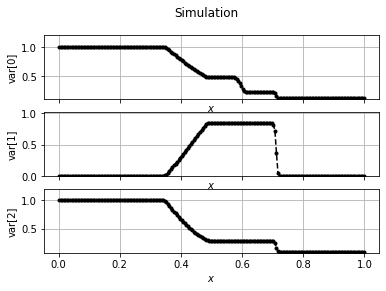

In [3]:
import plotResults

import tkinter
import tkinter.filedialog

get_ipython().run_line_magic('gui', 'tk')

results = plotResults.getResultsSingleFile(options)

x = results[0,:]
rho = results[1,:]
rhoU = results[2,:]
rhoE = results[3,:]

U = rhoU[:]/rho[:]
P = (rhoE[:] - rho[:]*U[:]*U[:]/2.)*(5./3. - 1)

primitiveVars = results
primitiveVars[0,:] =  x 
primitiveVars[1,:] =  rho
primitiveVars[2,:] =  U
primitiveVars[3,:] =  P


plotResults.makePlot(primitiveVars)


# Visualize individual results

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy.constants as phy_const
import os
import sys

import tkinter as tk

from tkinter import filedialog
sys.path.append('../PythonTools')
import plotResults

#sys.path.append('/Users/ab/Documents/1_Postdoc/MUFFIN/PythonTools')
%gui tk

root = tk.Tk()
root.withdraw()

<StateSpec object: ''>

In [5]:
plt.style.use('classic')
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.weight"] = 'normal'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["font.family"]   = 'Times New Roman'
plt.rcParams["font.size"] = 15
plt.rcParams["lines.linewidth"] = 2


Reading /Users/alvarez/Documents/1_Simulation/MUFFIN_Oxigen_Iodine/notebooks/Results_Euler/file_iter_000440_time_9.6202e-02.txt
NbEqs =  3
NbCells =  200


/var/folders/dm/fpq2vxz16_9577l0qt42tjqw0000gn/T/ipykernel_10948/3741699749.py:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  resultsTP   = resultsTP.astype(np.float)
/var/folders/dm/fpq2vxz16_9577l0qt42tjqw0000gn/T/ipykernel_10948/3741699749.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  resultsTP   = resultsTP.astype(np.float)


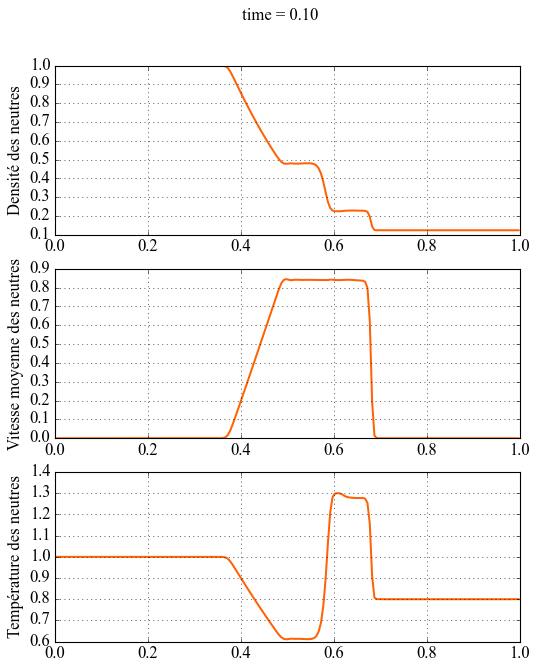

In [6]:
currentPath = os.getcwd()

root = tk.Tk()
root.withdraw()
filename = filedialog.askopenfilename(parent=root, initialdir=currentPath)


print('Reading %s' % filename)

results = []
with open(filename, 'r') as data:
    j = 0                   # counter of the lines of the file
    for line in data:
        p = line.split()
        results.append(np.array(p))


# Transpose and change data type
results = np.array(results)
resultsTP = np.transpose(results)

resultsTP   = resultsTP.astype(np.float)        

plotData = plotResults.Data(resultsTP)

print("NbEqs = ", plotData.nbEqs)
print("NbCells = ",plotData.nbCells)


# Transpose and change data type
results = np.array(results)
resultsTP = np.transpose(results)

resultsTP   = resultsTP.astype(np.float)        
plotData = plotResults.Data(resultsTP)

# Plot the results
x       = plotData.resultsArray[0]
rho     = plotData.resultsArray[1]
rhou     = plotData.resultsArray[2]
rhoE     = plotData.resultsArray[3]

m_Xe        = 131.293*phy_const.m_u
kB          = phy_const.Boltzmann
T0          = 300

U = rhou/rho
p = 2./3.*(rhoE - 0.5*rho*U**2)

T      =  (p/ rho) 

base     = os.path.basename(filename)
baseName = os.path.splitext(base)[0]
time     = float(baseName.rsplit('_', 1)[1])

f, ax = plt.subplots(3,1, figsize=(5*1.5,6*1.5))

ax[0].plot(x, rho, color=(255/255,97/255,3/255), linewidth=1.8, markersize=3, label ='Neutres')
#ax[0].set_ylim(0, max_rho)
ax[0].set_ylabel("Densité des neutres")


ax[1].plot(x, U, color=(255/255,97/255,3/255), linewidth=1.8, markersize=3, label ='Neutres')
#ax[1].set_ylim(-max_u, max_u)
ax[1].set_ylabel("Vitesse moyenne des neutres")


ax[2].plot(x, T, color=(255/255,97/255,3/255), linewidth=1.8, markersize=3, label ='Neutres')
#ax[2].set_ylim(0, max_Te)
ax[2].set_ylabel("Température des neutres")


title = 'time = %1.2f' % time

plt.suptitle(title)

for axis in ax:
    axis.grid(True)



# Animation

In [9]:
from IPython.display import HTML

fig, ax = plt.subplots()

ax.set_xlim(( 0, 1))
ax.set_ylim((0., 1.1))
ax.grid(True)

plt.close()

anim = plotResults.animationResults(fig=fig, ax=ax, varID=1)




# anim = plotResults.animationResults(fig=fig, ax=ax, varID=5)

HTML(anim.to_jshtml())

In [6]:
%matplotlib inline
import glob
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib

# # Choose results
root = tk.Tk()
root.withdraw()
currentPath = os.getcwd()
Directory   = filedialog.askdirectory(parent=root, initialdir=currentPath)

# open all the files in the directory and sort them to do the video in order
files       = glob.glob(Directory + "/*.txt")
filesSorted = sorted(files, key = lambda x: os.path.getmtime(x), reverse=True)
files.sort(key=os.path.getmtime)

# Initialize figure
fig, ax = plt.subplots(2,2, figsize=(12,8))

ax[0,0].set_xlim(( 0, 1.))
ax[0,1].set_xlim(( 0, 1.))
ax[1,0].set_xlim(( 0, 1.))
ax[1,1].set_xlim(( 0, 1.))

ax[0,0].set_ylim((0., 1.1))
ax[0,1].set_ylim((0., 1.1))
ax[1,0].set_ylim((0., 2.))
ax[1,1].set_ylim((0., 2.))
#ax[2,0].set_ylim((-1E11, 1E11))
#ax[2,1].set_ylim((-2E10, 2E10))

ax[0,0].grid(True)
ax[0,1].grid(True)
ax[1,0].grid(True)
ax[1,1].grid(True)
# ax[0,0].set_yscale('log')
# ax[0,0].set_ylim(( 1e-60, max_density))
#ax[2,0].grid(True)
#ax[2,1].grid(True)

line1, = ax[0,0].plot([], [], color=(255/255,97/255,3/255), linewidth=1.8, markersize=3)
ax[0,0].set_ylabel(r'$n$', fontsize=18)

line2, = ax[0,1].plot([], [], color=(255/255,97/255,3/255), linewidth=1.8, markersize=3)
ax[0,1].set_ylabel(r'$U$', fontsize=18)

line3, = ax[1,0].plot([], [], color=(255/255,97/255,3/255), linewidth=1.8, markersize=3)
ax[1,0].set_ylabel(r'$nE$', fontsize=18)

line4, = ax[1,1].plot([], [], color=(255/255,97/255,3/255), linewidth=1.8, markersize=3)
ax[1,1].set_ylabel(r'$T$', fontsize=18)

plt.close()

    
def animate_func(i):
    
    file_name = files[i]
    # Take the time
    base = os.path.basename(file_name)
    filenameBase = os.path.splitext(base)[0]
    time = filenameBase.rsplit('_', 1)[1]
    # Initializing data with the file name
    resultsData = plotResults.Data(array=None,filename = file_name)
    
    # Plot the results
    x       = resultsData.resultsArray[0]
    rho     = resultsData.resultsArray[1]
    rhou     = resultsData.resultsArray[2]
    rhoE     = resultsData.resultsArray[3]

    m_Xe        = 131.293*phy_const.m_u
    kB          = phy_const.Boltzmann
    T0          = 300

    U = rhou/rho
    p = 2./3.*(rhoE - 0.5*rho*U**2)

    T      =  (p/ rho) 
    
    line1.set_data(x, rho)
    line2.set_data(x, U)
    line3.set_data(x, rhoE)
    line4.set_data(x, T)

    return line1, line2, line3, line4   #, line6, line7

anim = animation.FuncAnimation(
                                fig,
                                animate_func,
                                frames = int(np.shape(files)[0])
                                )
#matplotlib.rcParams['animation.embed_limit'] = 2**128
HTML(anim.to_jshtml())

#anim.save('./Name.mp4')